# Bayesian A/B Test Example

## Library

In [5]:
import pymc as pm
import pandas as pd
import io
import numpy as np
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-white")
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Data


In [6]:
raw_data = io.StringIO('obs,store\n117,0\n0,0\n0,0\n134,0\n0,0\n0,0\n0,0\n0,0\n122,0\n0,0\n108,0\n0,0\n0,0\n0,0\n0,0\n124,0\n0,0\n0,0\n113,0\n118,0\n0,0\n105,0\n114,0\n0,0\n118,0\n106,0\n0,0\n100,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n0,0\n129,0\n0,0\n117,0\n0,0\n0,0\n0,0\n0,0\n0,0\n115,0\n123,0\n0,0\n0,0\n0,0\n137,0\n0,0\n0,0\n0,0\n0,0\n0,0\n136,0\n0,0\n107,0\n0,0\n0,0\n0,0\n0,0\n115,0\n118,0\n0,0\n105,0\n105,0\n97,0\n121,0\n0,0\n0,0\n0,0\n124,0\n114,0\n0,0\n101,0\n0,0\n0,0\n0,0\n121,0\n0,0\n0,0\n0,0\n119,0\n0,0\n108,0\n121,0\n0,0\n0,0\n116,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n127,0\n0,0\n0,0\n106,0\n0,0\n0,0\n0,0\n131,0\n0,0\n0,0\n128,0\n122,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n102,0\n119,0\n0,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n120,0\n0,1\n0,1\n0,1\n0,1\n0,1\n121,1\n0,1\n0,1\n0,1\n123,1\n0,1\n106,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n142,1\n0,1\n0,1\n0,1\n131,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n81,2\n0,2\n0,2\n73,2\n0,2\n0,2\n0,2\n69,2\n0,2\n94,2\n0,2\n91,2\n0,2\n0,2\n98,2\n0,2\n79,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n87,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n86,2\n97,2\n0,2\n0,2\n0,2\n76,2\n0,2\n83,2\n0,2\n0,2\n88,2\n0,2\n86,2\n0,2\n0,2\n99,2\n0,2\n0,2\n86,2\n86,2\n0,2\n93,2\n0,2\n0,2\n0,2\n90,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n67,2\n107,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n112,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n0,2\n81,2\n108,2\n92,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n72,2\n0,2\n97,2\n0,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n99,2\n90,2\n0,2\n76,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n100,2\n113,2\n0,2\n0,2\n0,2\n100,2\n0,2\n91,2\n0,2\n88,2\n0,2\n0,2\n0,2\n83,2\n0,2\n0,2\n82,2\n0,2\n84,2\n101,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n0,2\n0,2\n99,2\n91,2\n0,2\n95,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n91,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n92,2\n0,2\n0,2\n97,2\n70,2\n102,2\n0,2\n0,2\n0,2\n87,2\n111,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n79,2\n99,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n80,2\n90,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n71,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n94,2\n0,2\n79,2\n110,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n101,2\n0,2\n95,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n100,2\n92,2\n0,2\n0,2\n0,2\n110,2\n0,2\n0,2\n0,2\n0,2\n78,2\n0,2\n74,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n105,2\n0,2\n0,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n98,2\n89,2\n105,2\n0,2\n0,2\n93,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n91,2\n0,2\n89,2\n0,2\n0,2\n100,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n83,2\n0,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n89,2\n0,2\n0,2\n76,2\n0,2\n89,2\n0,2\n0,2\n0,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n112,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n104,2\n0,2\n89,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n86,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n83,2\n0,2\n81,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n83,2\n0,2\n94,2\n0,2\n0,2\n81,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n108,2\n')
data = pd.read_csv(raw_data)

In [7]:
data

,obs,store
0,117,0
1,0,0
2,0,0
3,134,0
4,0,0
...,...,...
696,0,2
697,87,2
698,0,2
699,0,2


## Bayesian Experiment with Predefined Priors

In [141]:
with pm.Model(coords=dict(store=data.store.unique())) as model:
    # Probability of purchase
    p = pm.Beta("p", mu=0.26, sigma=np.array([0.05, 0.04, 0.05]), dims="store")
    pm.Deterministic("delta_p", (p-0.26)/0.26, dims="store")
    # Log average purchase
    mu = pm.Normal("mu", np.log(97), 0.05, dims="store")
    pm.Deterministic("delta_mu", (pm.math.exp(mu)-97)/97, dims="store")
    # Deviation from average, proportion
    s = pm.LogNormal("s", np.log(0.1), 0.2)
    
    weights = pt.stack([1-p, p], axis=-1)
    
    lik = pm.Mixture(
        "obs", 
        weights[data.store],
        [pm.DiracDelta.dist(0.0), 
         pm.LogNormal.dist(mu[data.store], s)],
        observed=data.obs
    )
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p, mu, s]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


### Ploting Trace and Posterior

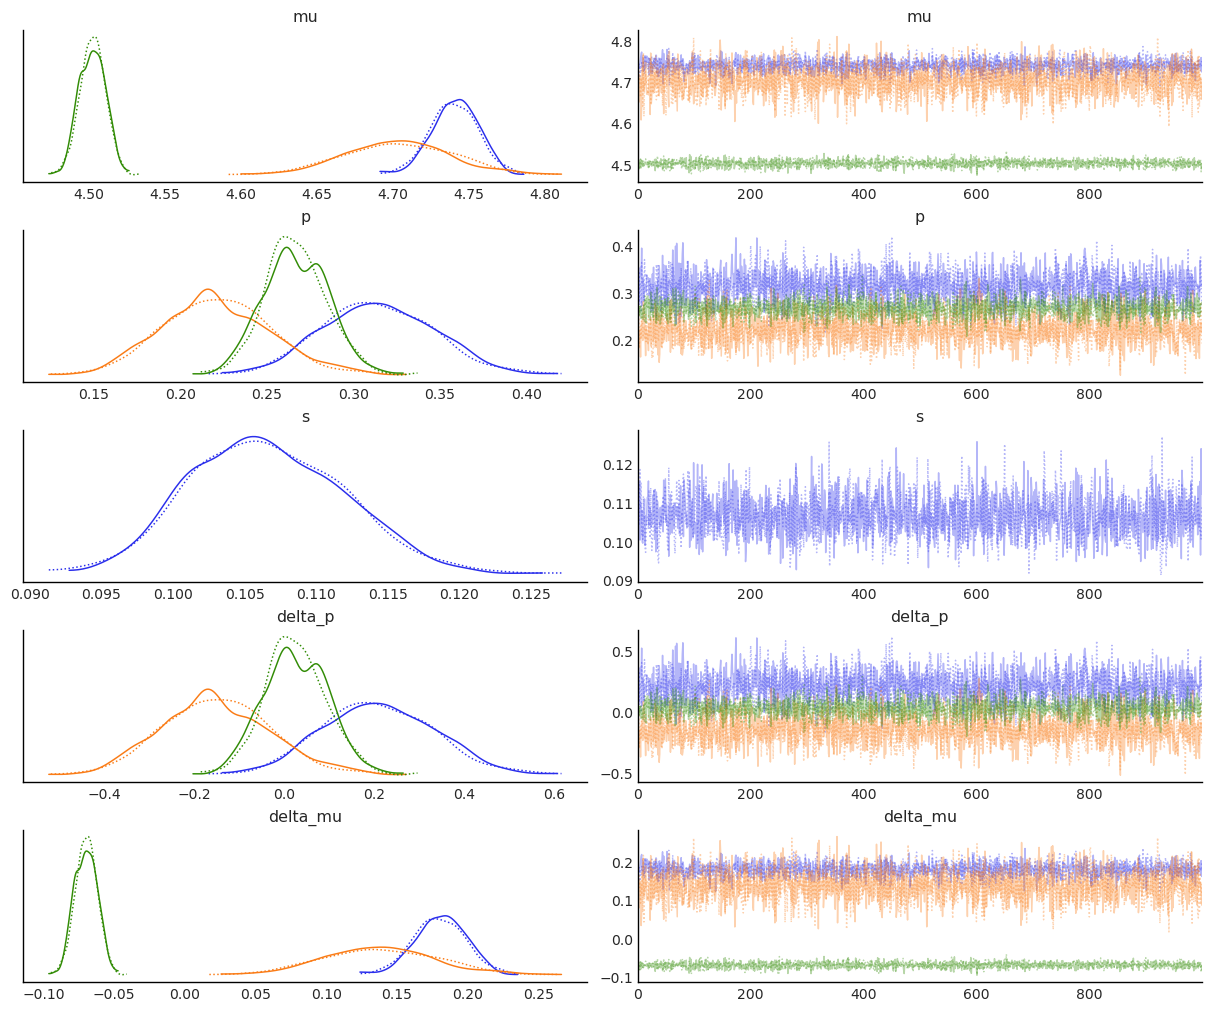

In [142]:
az.plot_trace(trace);


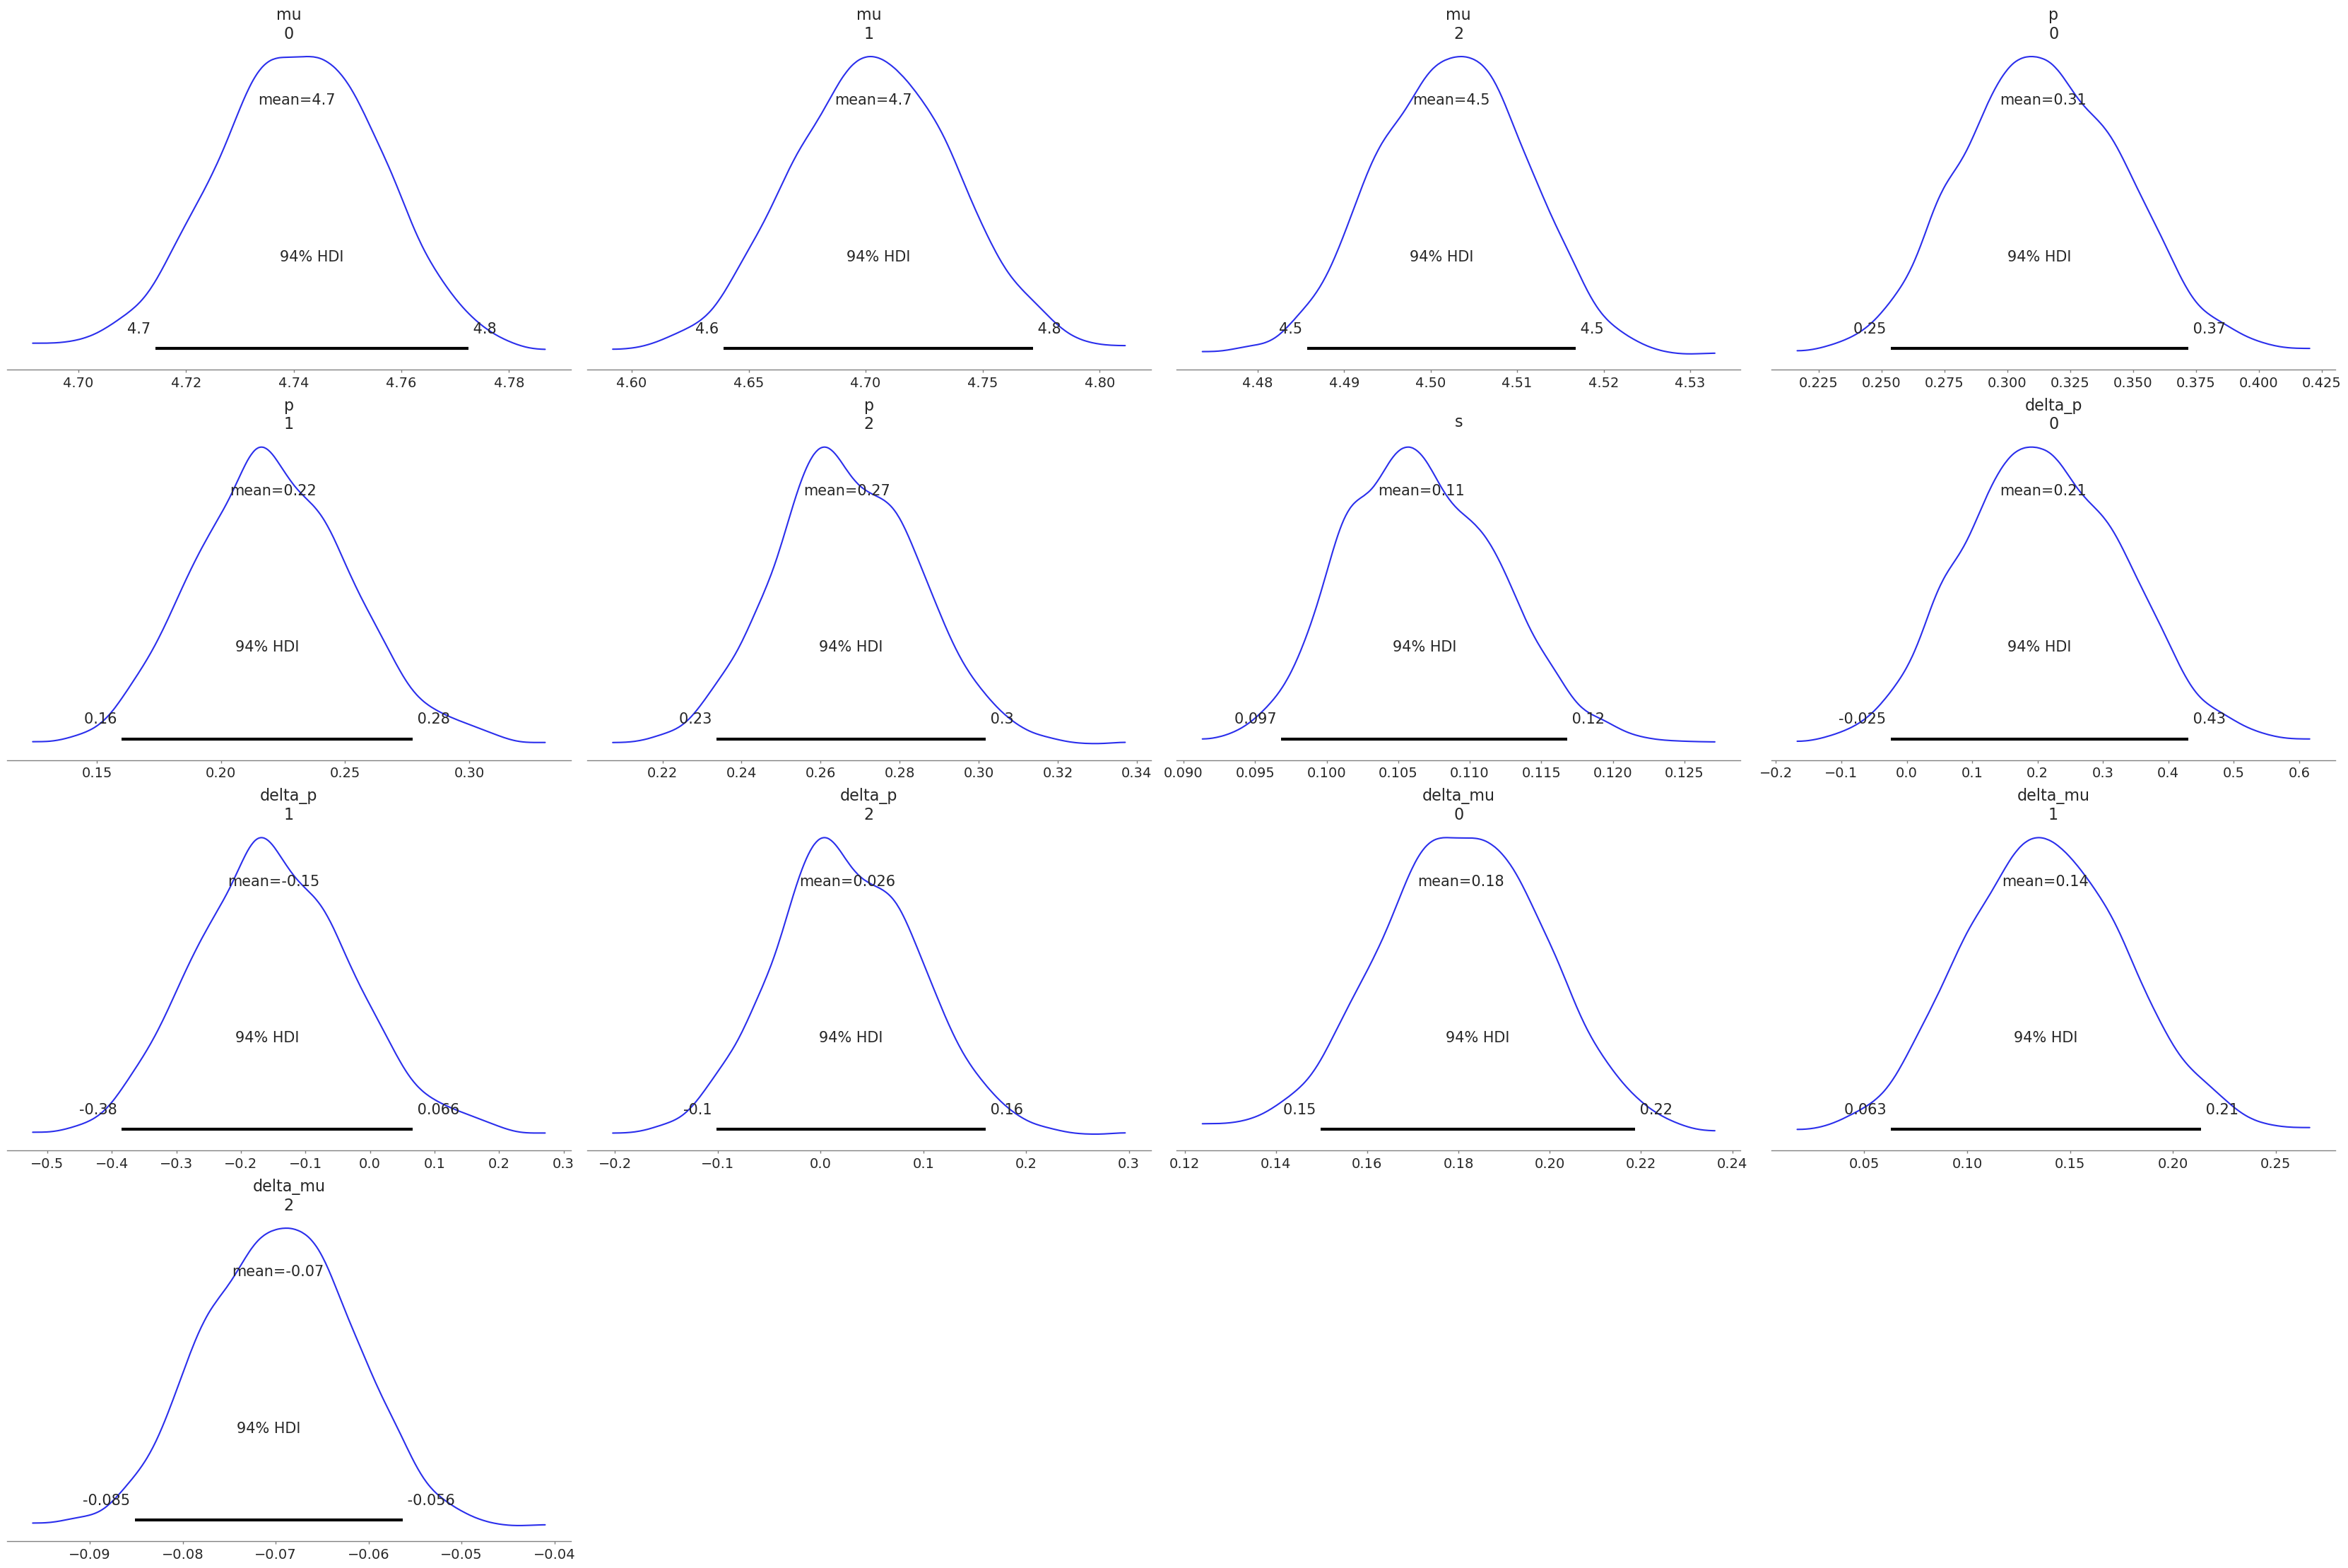

In [143]:
az.plot_posterior(trace);


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


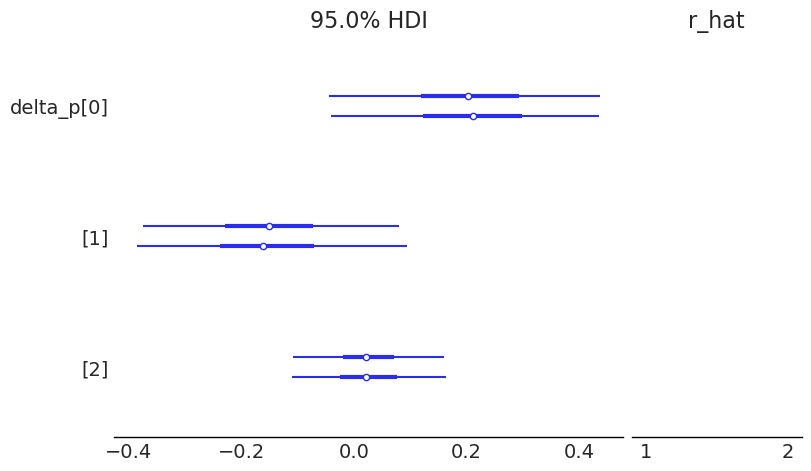

In [144]:
az.plot_forest(trace,
               var_names=["delta_p"],
               combined=False,
               hdi_prob=0.95, r_hat=True);


In [145]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [146]:
trace_var = trace.posterior.delta_p.sel(store=0).values
# delta_p_samples_store =trace_var.posterior.delta_p.values

In [147]:
trace_var

array([[0.18880198, 0.28966832, 0.15681225, ..., 0.28926565, 0.20830983,
        0.22890717],
       [0.12057816, 0.12057816, 0.33273359, ..., 0.46040188, 0.3458928 ,
        0.05685949]])

In [151]:
chance_to_beat_control_p = (trace_var > 0).mean()

In [153]:
chance_to_beat_control_p

0.9565

## Bayesian Analysis with Uninformative Prior

In [125]:


with pm.Model(coords=dict(store=data.store.unique())) as model:
    # Uninformative prior for probability of purchase
    p = pm.Uniform("p", lower=0, upper=1, dims="store")
    pm.Deterministic("delta_p", (p-0.26)/0.26, dims="store")
    
    # Normal prior for log average purchase
    mu = pm.Normal("mu", mu=0, sigma=1, dims="store")
    pm.Deterministic("delta_mu", (pm.math.exp(mu)-97)/97, dims="store")
    
    # Uninformative prior for deviation from average, proportion
    s = pm.Flat("s")
    
    weights = pt.stack([1-p, p], axis=-1)
    
    lik = pm.Mixture(
        "obs", 
        weights[data.store],
        [pm.DiracDelta.dist(0.0), 
         pm.LogNormal.dist(mu[data.store], s)],
        observed=data.obs
    )
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p, mu, s]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


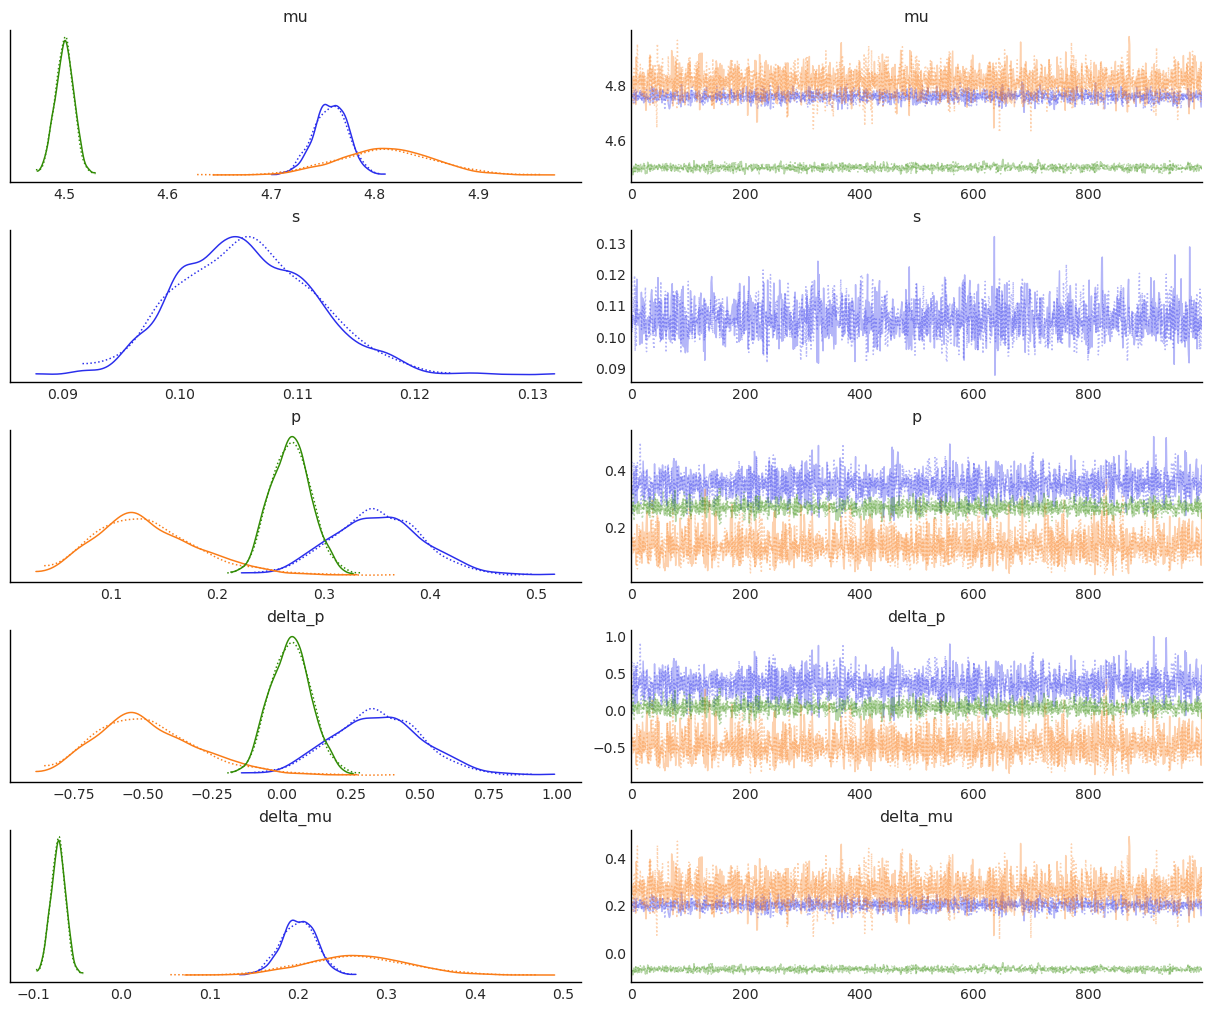

In [126]:
az.plot_trace(trace);


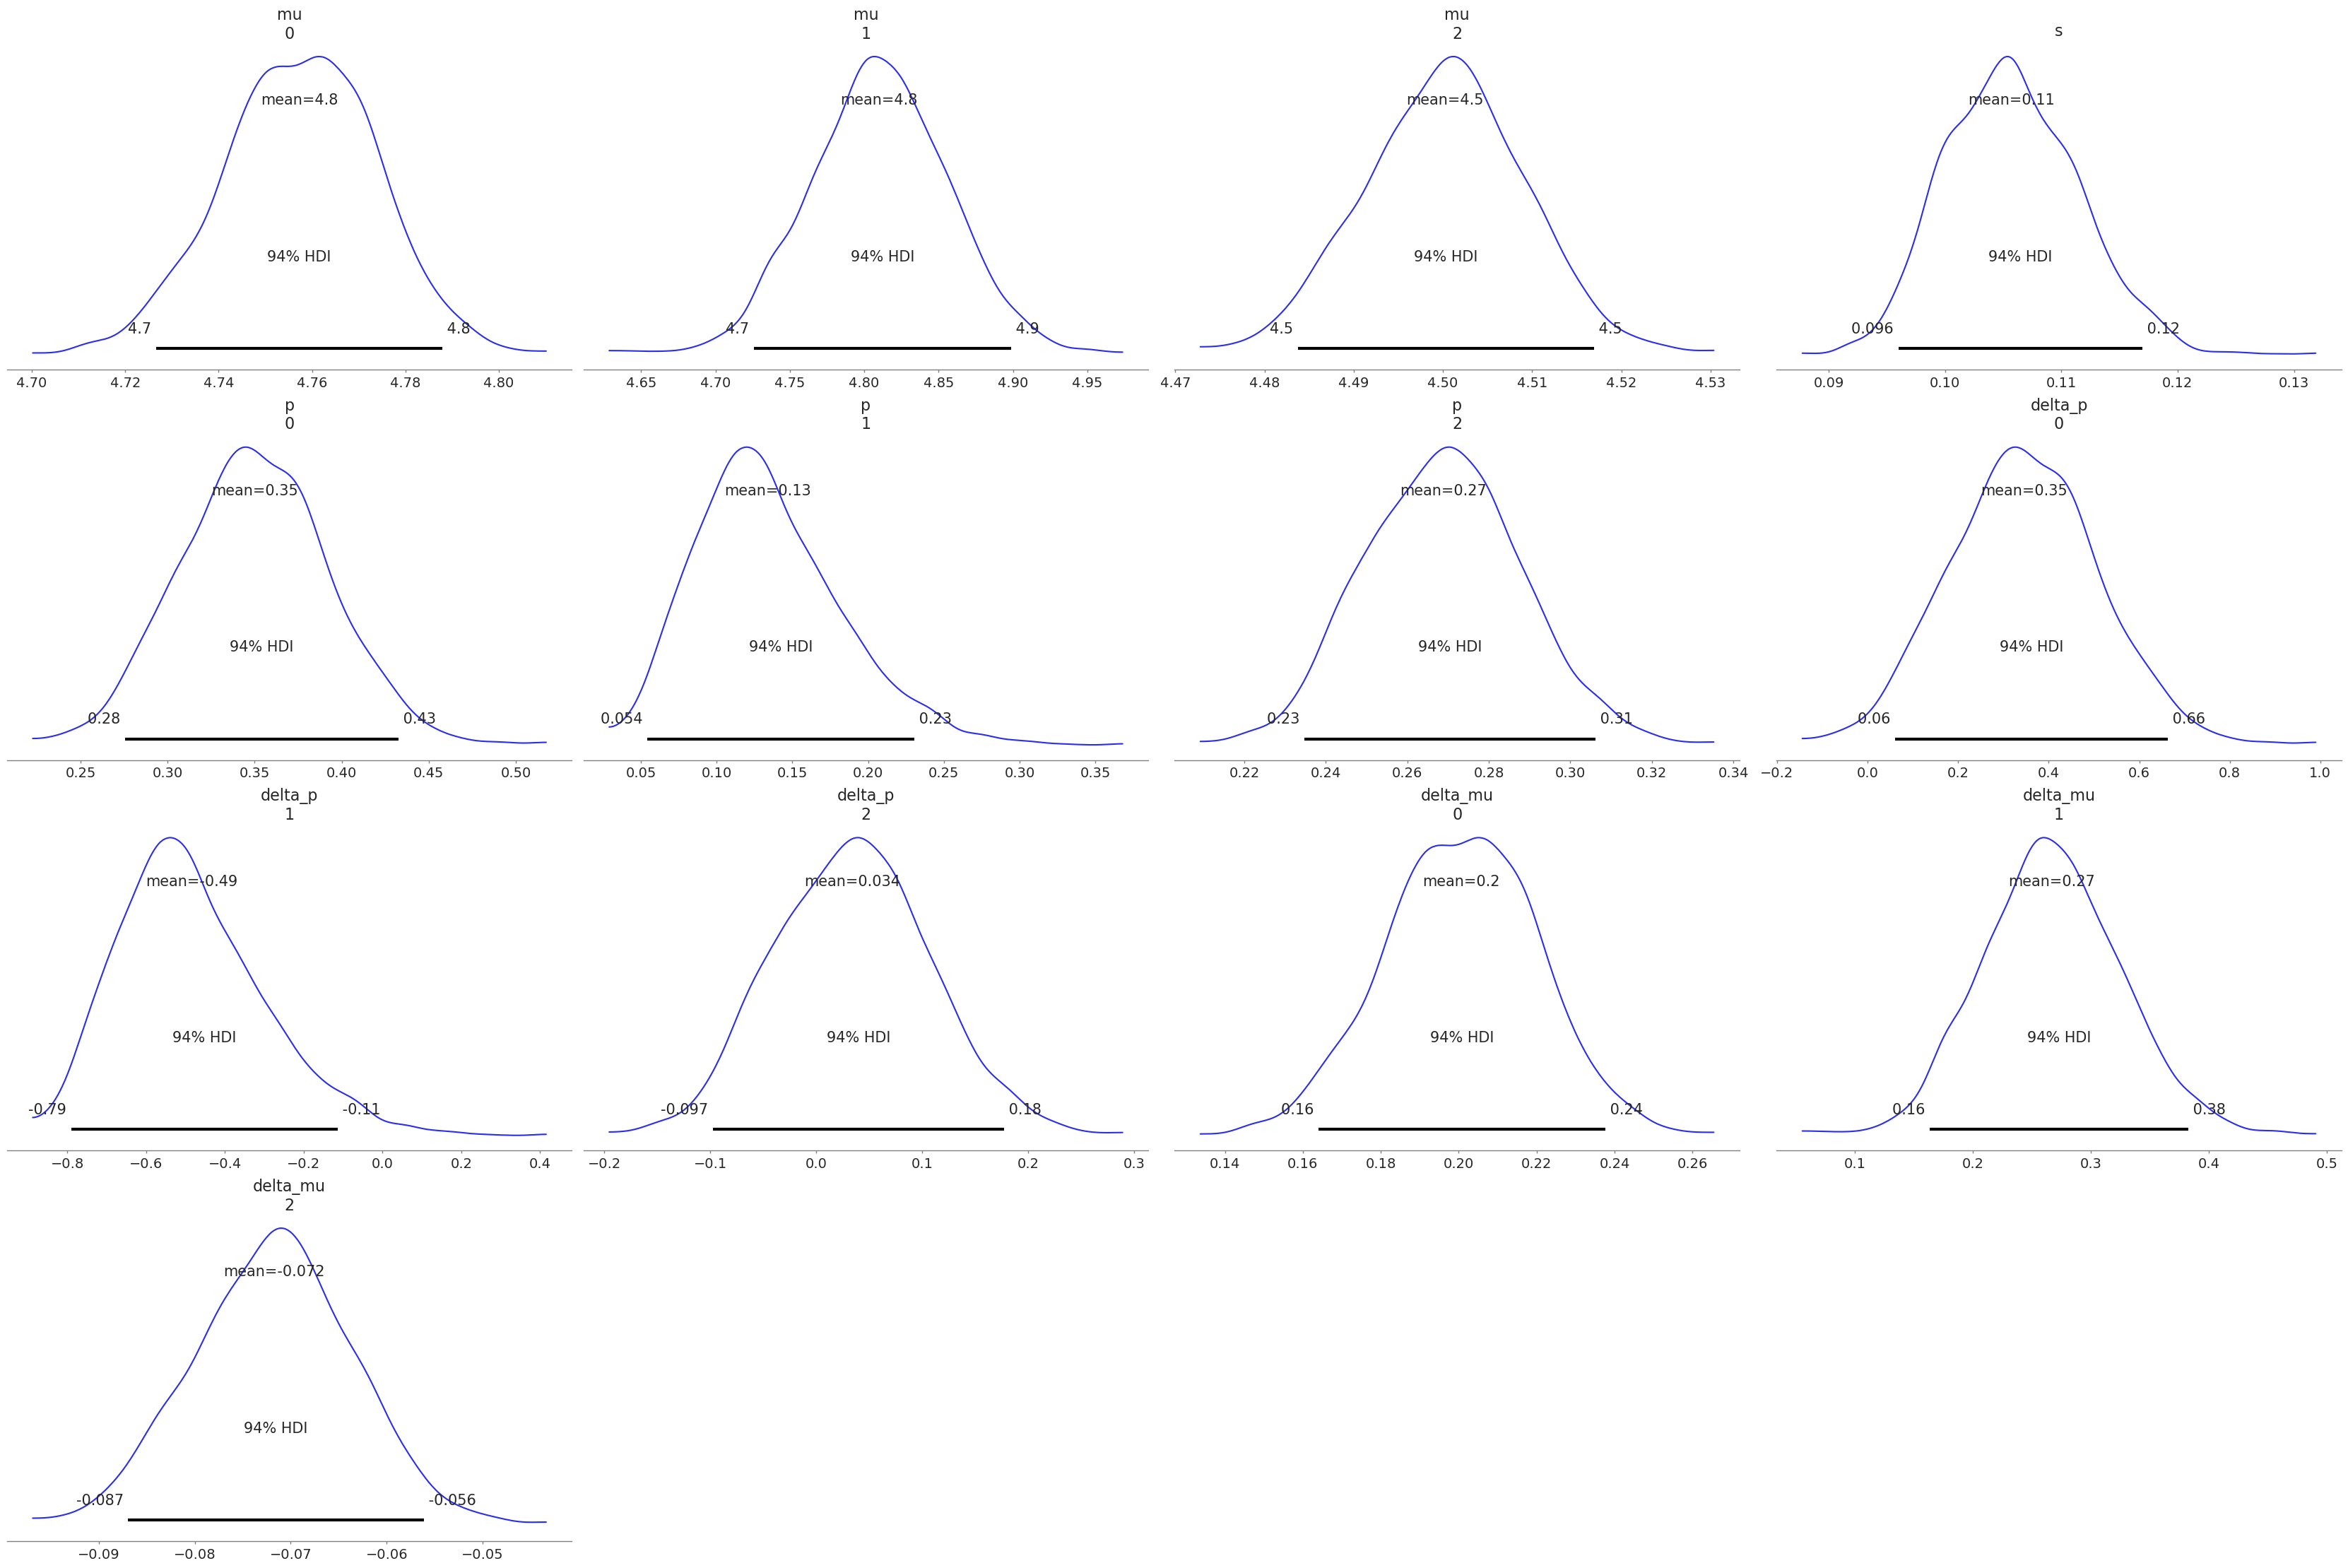

In [127]:
az.plot_posterior(trace);



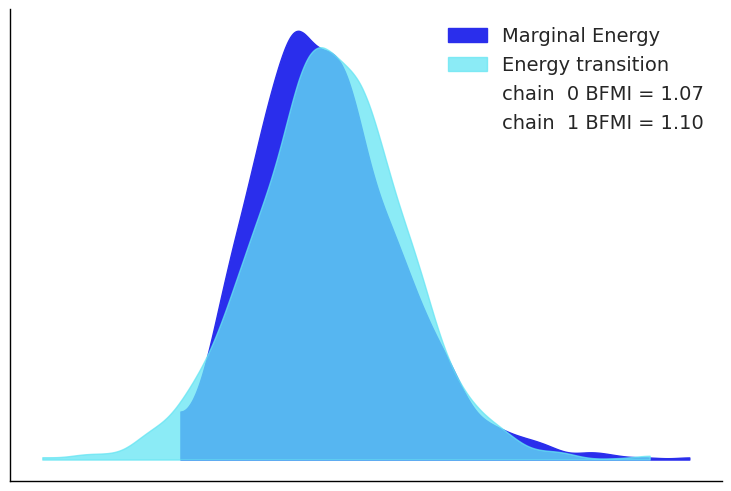

In [128]:
az.plot_energy(trace);


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


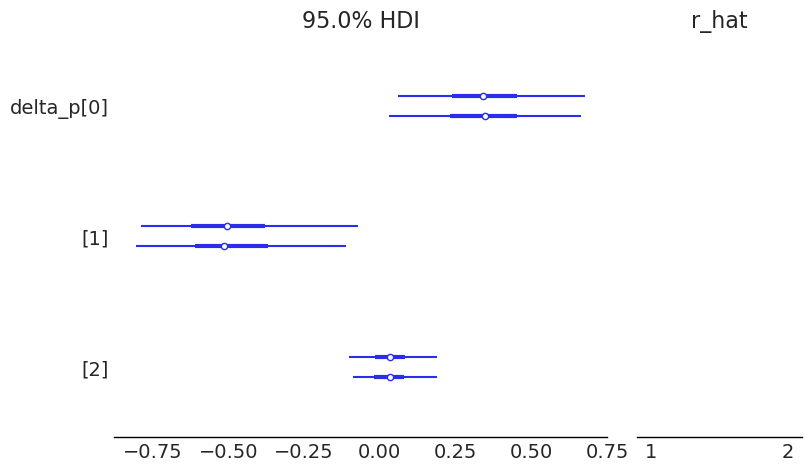

In [129]:
az.plot_forest(trace,
               var_names=["delta_p"],
               combined=False,
               hdi_prob=0.95, r_hat=True);


In [130]:

mu = 4.7
average_purchase = np.exp(mu)

print(average_purchase)

109.94717245212351


/tmp/ipykernel_28917/2863800561.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


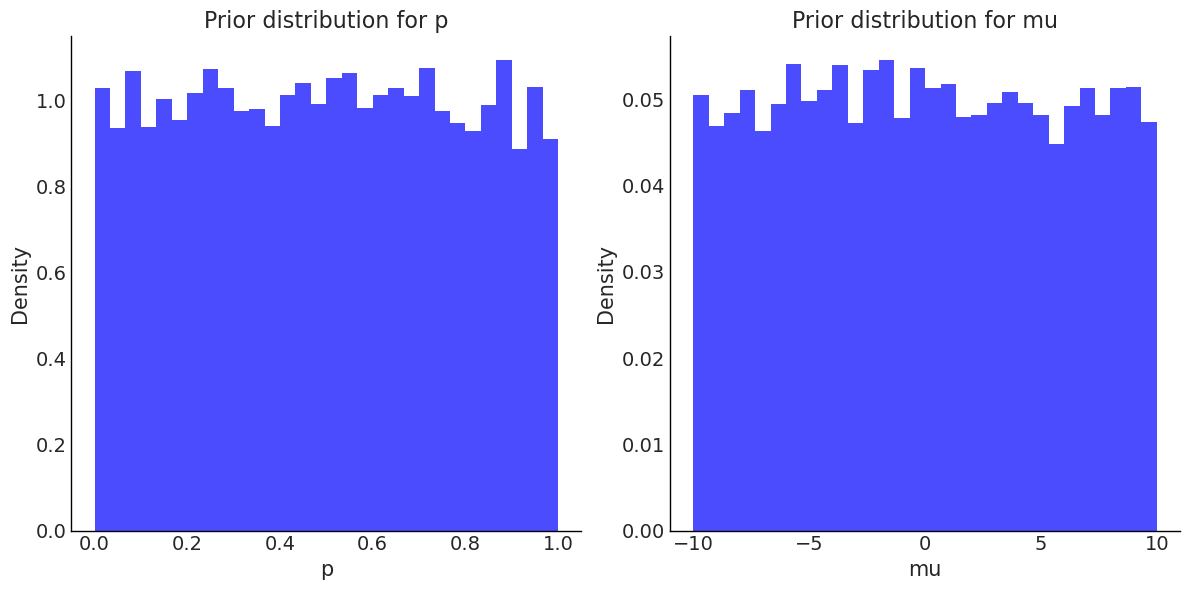

In [131]:
# Sample from the prior for p
p_prior_samples = np.random.uniform(0, 1, size=10000)

# Sample from the prior for mu (assuming it's a flat prior over the range -10 to 10)
mu_prior_samples = np.random.uniform(-10, 10, size=10000)

# Plot the prior distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(p_prior_samples, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Prior distribution for p')
plt.xlabel('p')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(mu_prior_samples, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Prior distribution for mu')
plt.xlabel('mu')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

/tmp/ipykernel_28917/1170989607.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


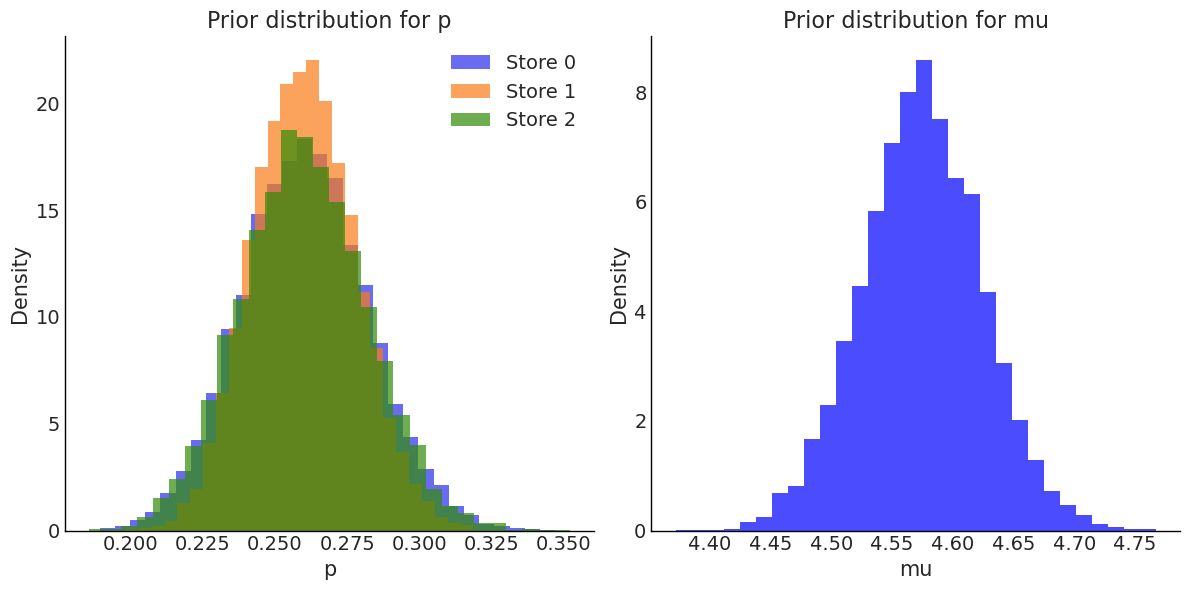

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the Beta distribution
mu_p = 0.26
sigma_p = np.array([0.05, 0.04, 0.05])

# Define parameters for the Normal distribution
mu_mu = np.log(97)
sigma_mu = 0.05

# Generate samples from the prior distributions
p_prior_samples = [np.random.beta(mu_p/s**2, (1-mu_p)/s**2, size=10000) for s in sigma_p]
mu_prior_samples = np.random.normal(mu_mu, sigma_mu, size=10000)

# Plot the prior distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for p
for i, samples in enumerate(p_prior_samples):
    ax[0].hist(samples, bins=30, density=True, alpha=0.7, label=f'Store {i}')
ax[0].set_title('Prior distribution for p')
ax[0].set_xlabel('p')
ax[0].set_ylabel('Density')
ax[0].legend()

# Plot for mu
ax[1].hist(mu_prior_samples, bins=30, density=True, color='blue', alpha=0.7)
ax[1].set_title('Prior distribution for mu')
ax[1].set_xlabel('mu')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [138]:
trace_var = trace.posterior.delta_p.sel(store=0).values
# delta_p_samples_store =trace_var.posterior.delta_p.values

In [139]:
chance_to_beat_control_p = (trace_var > 0).mean(axis=0)

In [140]:
chance_to_beat_control_p.mean()

0.985

## No Baseline 

In [154]:
with pm.Model(coords=dict(store=data.store.unique())) as model:
    # Uninformative prior for probability of purchase
    p = pm.Uniform("p", lower=0, upper=1, dims="store")
    pm.Deterministic("delta_p", p, dims="store")
    
    # Normal prior for log average purchase
    mu = pm.Normal("mu", mu=0, sigma=1, dims="store")
    pm.Deterministic("delta_mu", pm.math.exp(mu), dims="store")
    
    # Uninformative prior for deviation from average, proportion
    s = pm.Flat("s")
    
    weights = pt.stack([1-p, p], axis=-1)
    
    lik = pm.Mixture(
        "obs", 
        weights[data.store],
        [pm.DiracDelta.dist(0.0), 
         pm.LogNormal.dist(mu[data.store], s)],
        observed=data.obs
    )
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p, mu, s]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 29 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


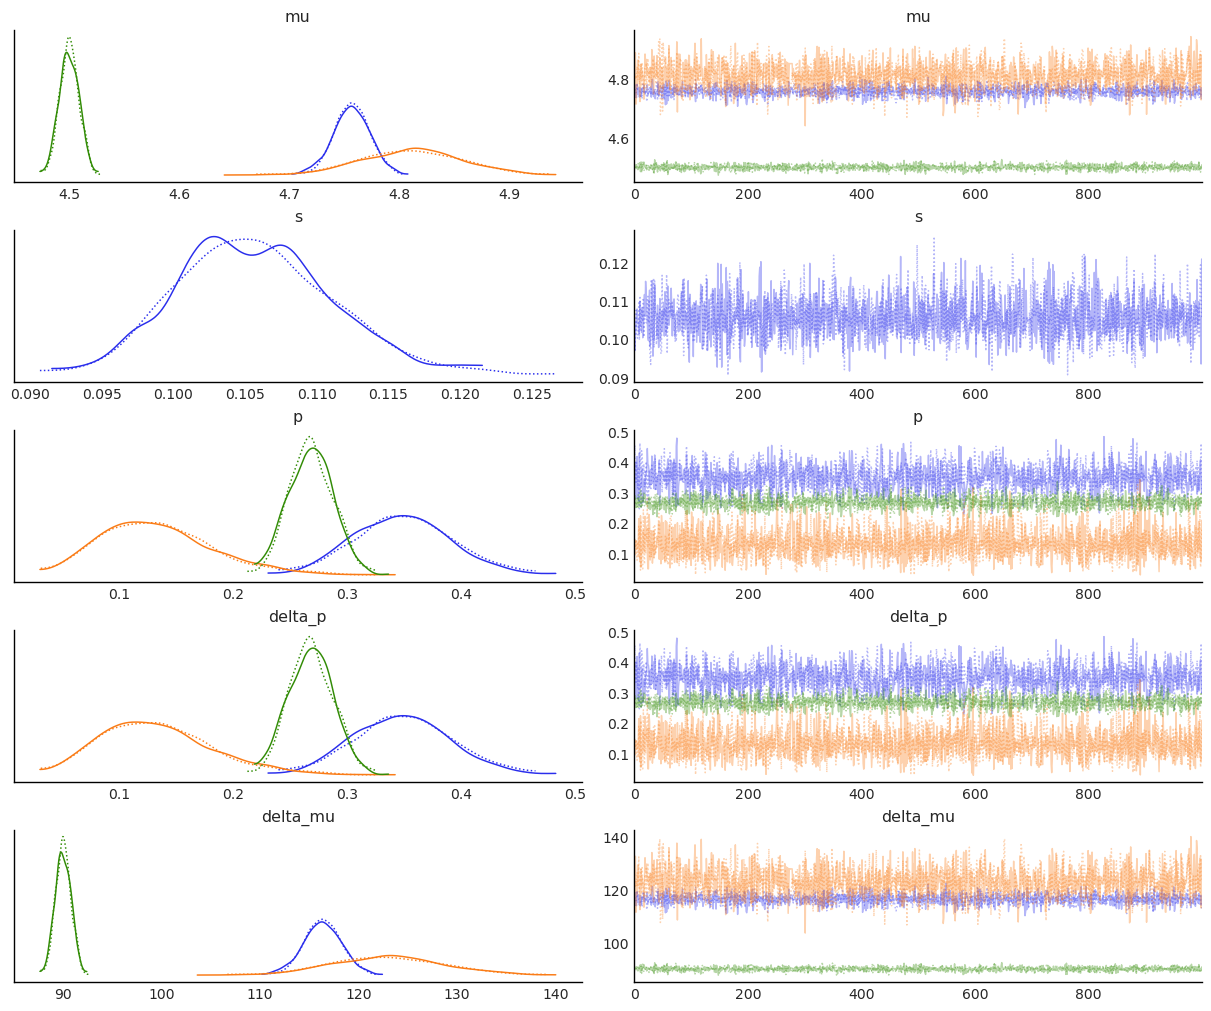

In [155]:
az.plot_trace(trace);


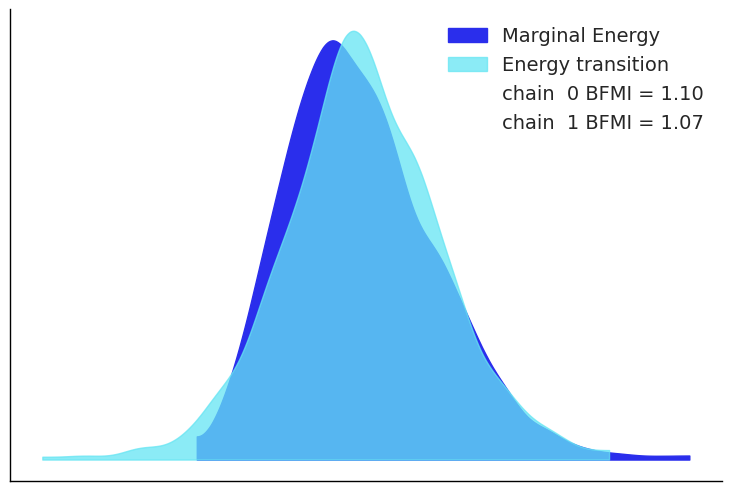

In [156]:
az.plot_energy(trace);


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:


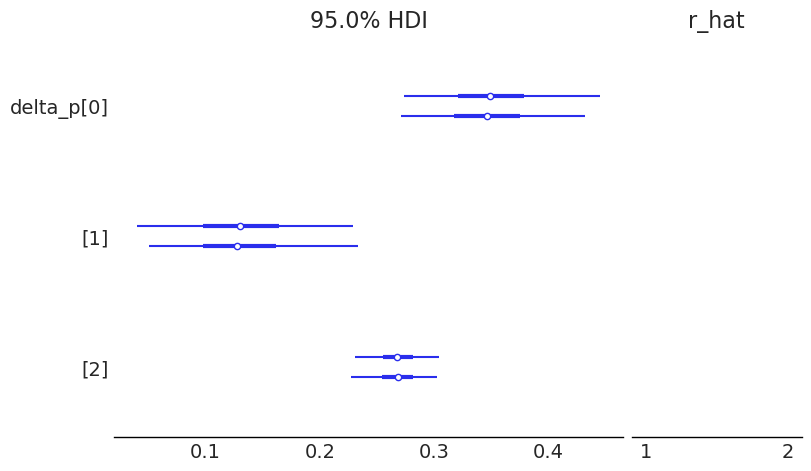

In [157]:
az.plot_forest(trace,
               var_names=["delta_p"],
               combined=False,
               hdi_prob=0.95, r_hat=True);


In [158]:
trace_var = trace.posterior.delta_p.sel(store=0).values
chance_to_beat_control_p = (trace_var > 0).mean(axis=0)
chance_to_beat_control_p.mean()

1.0

## Focusing on P Only

In [34]:
# import pymc3 as pmc

In [42]:
data['store'] = pd.Categorical(data['store'])


In [43]:
store_categories = data['store'].cat.categories

In [39]:
# Convert store categories to integer codes for indexing
store_codes = data['store'].cat.codes

In [44]:
n_stores = len(store_categories)


In [51]:
data['new_column'] = (data['obs'] != 0).astype(int)

In [52]:
with pm.Model() as model:
    # Register store coordinate
    store_coords = pm.Data('store_coords', store_categories, dims='store')
    
    # Priors for the probability of purchase per store
    p = pm.Beta("p", alpha=0.26, beta=(1 - 0.26), dims='store')
    
    # Deterministic transformations for interpretability
    delta_p = pm.Deterministic("delta_p", (p - 0.26) / 0.26, dims='store')
    
    # Likelihood of observing the data
    # Convert store categories to integer codes for indexing
    store_codes = data['store'].cat.codes
    obs = pm.Bernoulli("obs", p=p[store_codes], observed=data['new_column'])
    trace = pm.sample()

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


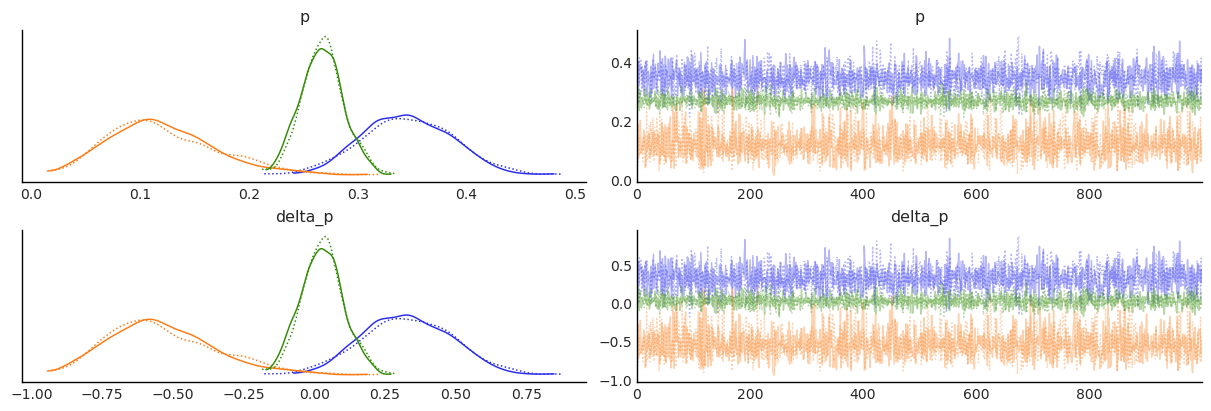

In [53]:
az.plot_trace(trace);


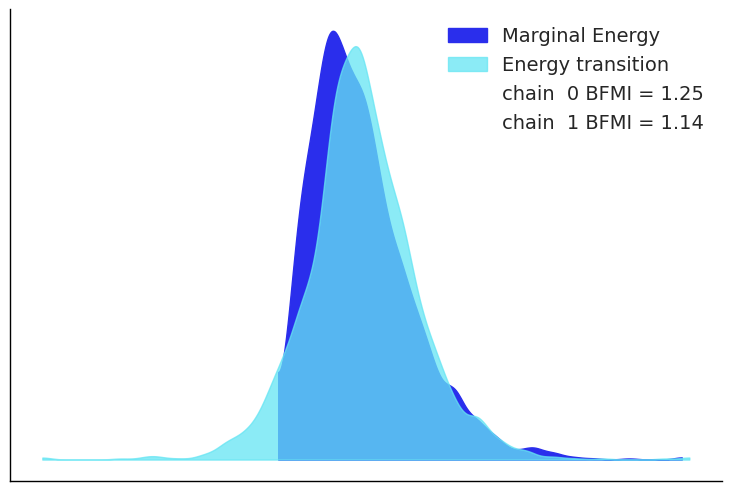

In [59]:
az.plot_energy(trace);


In [63]:
# !pip install -U arviz
